In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 9)
plt.rcParams["font.size"] = 18

# Transport Fundamentals

Some fundamentals beyond the life cycle of the fission neutron.

## Learning Objectives

- Calculate the dynamic impact of reactivity feedback on criticality.
- Recognize the impact of moderator material choice on reactor behavior.
- Analyze reactor behavior.
- Calculate the impact of geometry on criticality.
- State Fick's Law.
- Apply diffusion to neutron transport.
- Establish the one group diffusion equation.
- Derive the multigroup diffusion equations.
- State the definition and meaning of the transport cross section.

### Reactivity is deviation from k


\begin{align}
\rho &= \frac{k-1}{k}
\end{align}


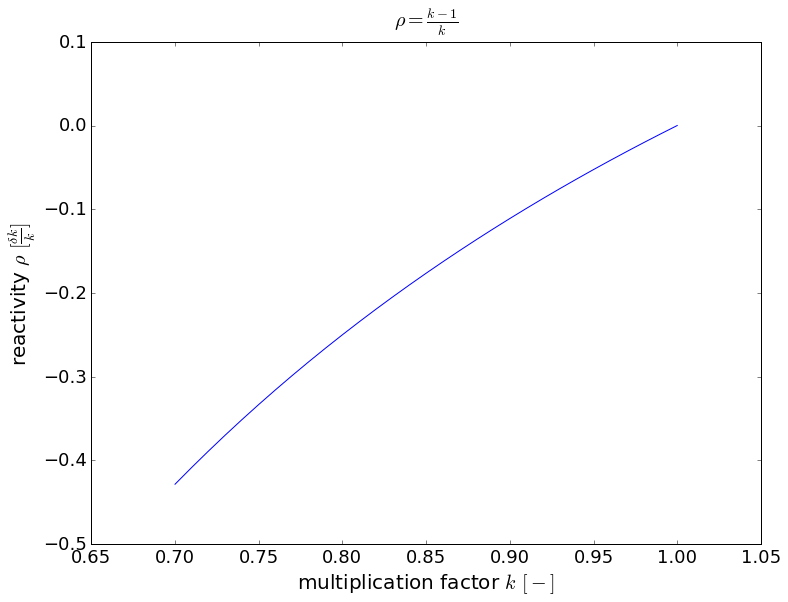

In [3]:
def rho(k):
    """reactivity, rho
    :param k: multiplication factor
    """
    return (k-1)/k

# Plot reactivity as a function of k
import numpy as np
k_vals = np.arange(0.7, 1.0, 0.01)
r = [rho(k) for k in k_vals]
plt.plot(k_vals, r)
plt.ylabel(r'reactivity $\rho$ $[\frac{\delta k}{k}]$',fontsize=20,)
plt.xlabel(r'multiplication factor $k$ $[-]$',fontsize=20,)
plt.title(r'$\rho = \frac{k-1}{k}$', fontsize=20, y=1.02)

## Neutron Transport Fundamentals


### Fast Homogenous Reactor

Consider a reactor that is:

- fast
- critical
- the fuel and coolant are a homogeneous mixture
- the reactor has only one region, no reflector ("bare" reactor)

This reactor can be described by the one group diffusion equation:

\begin{align}
D\nabla^2\phi-\Sigma_a\phi + s &= \frac{1}{v}\frac{\partial \phi}{\partial t}\\
D &= \mbox{ the diffusion coefficient}\\
\phi &= \mbox{ flux}\\
v &= \mbox{ neutron speed}
\end{align}

If the fission source, $s$ does not balance neutron absorption and leakage, then the right hand side of the one-group diffusion equation is nonzero and the power may increase or decrease with time.

#### Steady state

 

The multiplication factor, k, can be used to adjust the source strength and reach a steady state diffusion equation:


\begin{align}
D\nabla^2\phi-\Sigma_a\phi + \frac{1}{k}\nu\Sigma_f\phi &= 0\\
\end{align}




## Diffusion Solution

k-effective =  [ 1.00031031]
 approx alpha =  [ 0.00021715]


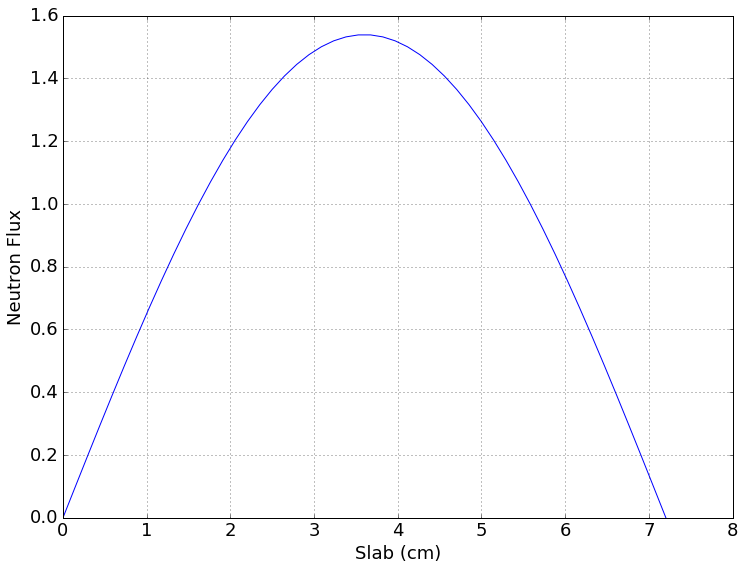

In [4]:
## This code example was adapted from
## https://github.com/marort91/AlphaEigenvalue/blob/master/RadiationTransportCoding/NeutronDiffusion_Python/NDE_CriticalityEigenvalue.ipynb

def diff(sig_tr):
    return 1.0/(3.0*sig_tr)

def sig_tr(e):
    sig_t(e) - mu*sig_s(e)

D = diff(0.1)
nusigf = 0.70
siga = 0.066    

Lx = np.pi*((nusigf-siga)/D)**(-0.5)

N = 50;
h = Lx/(N-1)

x = np.zeros(N)

for i in range(N-1):
    x[i+1] = x[i] + h
    
    
L = np.zeros((N,N))
A = np.zeros((N,N))
M = np.zeros((N,N))

for i in range(N):
    L[i][i] = L[i][i] + (-2*(-D/(h**2)))
    
for i in range(1,N):
    L[i][i-1] = L[i][i-1] + (-D/h**2)
    
for i in range(N-1):
    L[i][i+1] = L[i][i+1] + (-D/h**2)
    
for i in range(N):
    A[i][i] = A[i][i] + siga
    
M = L + A

M[0][0] = 1
M[0][1] = 0
M[N-1][N-1] = 1
M[N-1][N-2] = 0

phi0 = np.ones((N,1))
phi0[0] = 0
phi0[N-1] = 0

tol = 1e-15
k = 1.00


def is_converged(k_old, k, tol):
    return np.abs(k - k_old) <= tol

for i in range(100):
    # update k
    k_old = k
    # solve for psi
    psi = np.linalg.solve(M, nusigf*phi0)
    
    # solve for k
    k = sum(nusigf*psi)/sum(nusigf*phi0)
    
    # solve for phi
    phi0 = (1/k)*psi
    phi0[0] = 0
    phi0[N-1] = 0
    
    # determine convergence
    if is_converged(k_old, k, tol):
        break
        
plt.plot(x, phi0)
plt.xlabel('Slab (cm)')
plt.ylabel('Neutron Flux')
plt.grid()

print("k-effective = ", k)

print(" approx alpha = ", rho(k) * sum(nusigf*phi0)/sum(phi0))

### One Group Reactor Equation

We can define a quantity, geometric bucking, as:

\begin{align}
B^2 &= \frac{1}{D}\left(\frac{\nu}{k}\Sigma_f - \Sigma_a\right)\\
\end{align}

Next, we can simplify the previous equation using this definition, so that the one-group reactor equation becomes:


\begin{align}
\nabla^2\phi + B^2\phi &= 0\\
\end{align}

To find the criticality of a reactor with a specific geometry, then, we can solve the geometric buckling equation for k:

\begin{align}
k &= \frac{\nu\Sigma_f}{DB^2 + \Sigma_a}\\
\end{align}


The buckling, B, is used to help describe the geometry of the system. The solutions of the one group reactor equation for boundary conditions corresponding to canonical shapes provide both flux and buckling formulae for each canonical shape:

#### Slab
Thickness a:
\begin{align}
\phi &= cos\left(\frac{\pi x}{a}\right)\\
B^2 &= \frac{\pi^2}{a^2} 
\end{align}

#### Cylinder
Height H, Radius R:
\begin{align}
\phi &= J_0\left(\frac{\nu_0r}{R}\right)cos\left(\frac{\pi z}{H}\right)\\
B^2 &= \frac{\nu_0^2}{R^2} + \frac{\pi^2}{H^2}
\end{align}

#### Sphere
Radius R:
\begin{align}
\phi &= \left(\frac{1}{r}\right)sin\left(\frac{\pi r}{R}\right)\\
B^2 &= \frac{\pi^2}{R^2} 
\end{align}

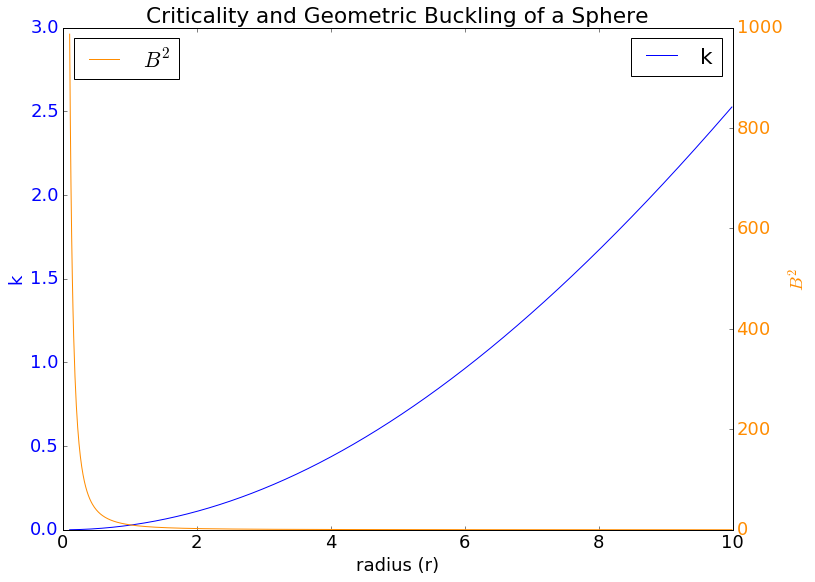

In [7]:
def k(nusigf, diff, bsq, siga):
    return nusigf/(diff*bsq + siga)


def bsq_sphere(r):
    return (np.pi**2)/(r**2)



nusigf = 0.3
diff = 1.1
siga =0.01

fig, ax1 = plt.subplots()
radii = np.arange(0.1, 10.0, 0.01)
ax1.plot(radii, k(nusigf, diff, bsq_sphere(radii), siga), 'b-', label='k')
ax1.set_xlabel('radius (r)')
ax1.set_ylabel('k', color='b')
ax1.set_title('Criticality and Geometric Buckling of a Sphere')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

    
ax2 = ax1.twinx()

ax2.plot(radii,  bsq_sphere(radii), 'darkorange', label=r'$B^2$')
ax2.set_ylabel(r'$B^2$', color='darkorange')
for tl in ax2.get_yticklabels():
    tl.set_color('darkorange')

ax1.legend()
ax2.legend(loc=2)

### Multigroup and beyond

To capture the variation of neutron energies in the diffusion equation, we can discretize the flux into energy groups.

\begin{align}
\phi &= \sum_{g=1}^{g=G}\phi_g\\
\phi_g &= \int_{E_g}^{E_{g-1}}\phi(E)dE\rvert_{g = 1,G}
\end{align}

The diffusion coefficient also needs to be individually evaluated for each energy group such that we have a $D_g$ for each group g. Also, it is important to consider possible paths of demise for potential fission neutrons. 

The derivation, based on integration, can be found in Lamarsh Ch. 5. It is based on the following integration:

\begin{align}
\int_{E_g}^{E_{g-1}}dE\left[-\nabla D(\vec{r},E)\nabla\phi(\vec{r},E)+ \Sigma_t(\vec{r},E)\phi(\vec{r},E)\right] &= \int_{E_g}^{E_{g-1}}dE\left[\int_{E'}\Sigma_{s}(\vec{r},E'\rightarrow E)\phi(\vec{r},E') + S(\vec{r},E)\right]\\
\end{align}

Once this integration is completed for a set of group boundaries, $g\in[1,G] \rightarrow E_g\in[E_1,E_G]$, one can generically write:

\begin{align}
-\nabla D_g\nabla\phi_g+ \Sigma_{t,g}\phi_g &= \sum_{g'=1}^{g'=G}\Sigma_{s}^{g'\rightarrow g}\phi_{g'} + S\int_{E_g}^{E_{g-1}}\chi(E)dE\\
\end{align}

Recall, however, that the fission spectrum is a probability density function, so one can also write the following identities:

\begin{align}
\int_0^\infty\chi(E) &= 1\\ 
\chi_g &= \int_{E_g}^{E_{g-1}}\chi(E)dE\\ 
\sum_{g=1}^{g=G}\chi_g &= 1\\
\end{align}

This simplifies the diffusion equation:

\begin{align}
-\nabla D_g\nabla^2\phi_g+ \Sigma_{t,g}\phi_g &= \sum_{g'=1}^{g'=G}\Sigma_{s}^{g'\rightarrow g}\phi_{g'} + \chi_gS\\
\end{align}

where

\begin{align}
S &= \sum_{g'=1}^{g'=G}(\nu\Sigma_f)_{g'}\phi_{g'}
\end{align}

#### Group Removal Cross Section

The right hand side summation of the scattering cross section is confusing though. Most of the scattering is from other groups into this one, but some of the scattering is from this group into itself. Keeping that term, $\Sigma_s^{g'\rightarrow g}$ on the right hand side is misleading. It's not a source of new neutrons. So, we have a change of variables that can clean this up, the group removal cross section.


\begin{align}
\Sigma_{R,g} &= \Sigma_{t,g} - \Sigma_{s}^{g'\rightarrow g}
\end{align}

If we use the group removal cross section, then we arrivae at the following form of the multigroup equation.


\begin{align}
-\nabla D_g\nabla^2\phi_g+ \Sigma_{R,g}\phi_g &= \sum_{g'\ne G}^{g'=G}\Sigma_{s}^{g'\rightarrow g}\phi_{g'} + \chi_g\sum_{g'=1}^{g'=G}(\nu\Sigma_f)_{g'}\phi_{g'}\\
\end{align}

### Two Group Diffusion

Let's define just two groups, fast and thermal. Let's also state that all prompt neutrons are born fast and that the diffusion coefficient and cross sections do not vary in space. With these assumptions, we arrive at the following two equations:


\begin{align}
-D_1\nabla^2\phi_1 + \Sigma_{R,1}\phi_1 &= \Sigma_{s}^{2\rightarrow 1}\phi_{2} + \left[(\nu\Sigma_f)_{1}\phi_{1} + (\nu\Sigma_f)_{2}\phi_{2}\right]\\
\end{align}

\begin{align}
- D_2\nabla^2\phi_2+ \Sigma_{R,2}\phi_2 &= \Sigma_{s}^{1\rightarrow 2}\phi_{1}\\
\end{align}



**Discussion: What happened to the prompt fission spectrum, $\chi_g$ in the above equations?**

![https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Question_Mark.svg/500px-Question_Mark.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Question_Mark.svg/500px-Question_Mark.svg.png)

**Discussion: If we neglect upscattering, which term or terms in the above two equations will disappear?**


![https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Question_Mark.svg/500px-Question_Mark.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Question_Mark.svg/500px-Question_Mark.svg.png)

### Criticality calculation


For criticality calculations, one might normalize the prompt fission spectrum with k as we have done before. For simplicity, one can move the scattering term to the left hand side, as if to say "diffusion, group removal, and scattering are balanced at criticality."


\begin{align}
-\nabla D_g\nabla\phi_g+ \Sigma_{R,g}\phi_g - \sum_{g'\ne G}^{g'=G}\Sigma_{s}^{g'\rightarrow g}\phi_{g'} &= \frac{1}{k}\chi_g\sum_{g'=1}^{g'=G}(\nu\Sigma_f)_{g'}\phi_{g'}\\
\end{align}

This change propagates to the explicit equations for two groups thus:


\begin{align}
- D_1\nabla^2\phi_1 + \Sigma_{R,1}\phi_1 - \Sigma_{s}^{2\rightarrow 1}\phi_{2} &= \frac{1}{k}\chi_1\left[(\nu\Sigma_f)_{1}\phi_{1} + (\nu\Sigma_f)_{2}\phi_{2}\right]\\
\end{align}

\begin{align}
- D_2\nabla^2\phi_2+ \Sigma_{R,2}\phi_2 - \Sigma_{s}^{1\rightarrow 2}\phi_{1} &= 0\\
\end{align}





## Fick's Law

Backing up, let's review diffusion in the context of Fick's law. In one dimension:

\begin{align}
J_x = -D\frac{d\phi}{dx}
\end{align}

For multiple spatial variables, we use the grad symbol $\nabla$ to indicate the gradient in all spatial dimensions:



\begin{align}
\vec{J} = -D\nabla\phi
\end{align}


J is the neutron current density (or, just the neutron current) and is a *vector quantity*. We can use it to describe the flow of neutrons into and out of a volume. If $\hat{n}$ is the unit normal vector pointing out of a surface, then,

\begin{align}
\vec{J}\cdot\hat{n} = \frac{\mbox{neutrons passing outward through the surface}}{cm^2s}\\
\end{align}


# Steady State 2D Multi-Group 

Steady-state 2D multi-group neutron diffusion equation

\begin{align}
\nabla\cdot J_g(x,y) &+\Sigma_{r,g}(x,y)\phi_g(x,y) = S_g(x,y)
\end{align}
where

\begin{align}J_g(x,y) &= -D_g(x,y)\nabla\phi_g(x, y)\\
\Sigma_{r,g}(x,y) &= \Sigma_{a,g}(x,y) + \sum_{g'\ne g}\Sigma_{s,g\rightarrow g'}(x,y)\\
S_g(x,y) &= \frac{\chi_g(x,y)}{k}\sum_{g'}\nu\Sigma_{f,g'}\phi_{g'}(x,y) + \sum_{g'\ne g}\Sigma_{s,g'\rightarrow g}(x,y)\phi_{g'}\\
D_g(x,y) &= \frac{1}{3\Sigma_{tr,g}(x,y)}
\end{align}


### Nomenclature

#### Subscripts

 \begin{align}
  g &= \mbox{energy group (discrete energy interval)}
 \end{align}
 
#### Variables

 \begin{align}
  \phi_g(x,y) &= \mbox{neutron flux}\\
  J_g(x,y) &= \mbox{neutron current (or neutron current density)}
  \end{align}

#### Coefficients (cross-sections, material properties)

 \begin{align}
\Sigma_{r,g}(x,y) &= \mbox{removal cross-section, sum of absorption and out-scattering (scattering from group g to group g’)}\\
D{g}(x,y) &= \mbox{diffusion coefficient (analogous to conductivity in heat conduction)}\\
\Sigma_{a,g}(x,y)&= \mbox{absorption cross-section}\\
\Sigma_{s,g\rightarrow g'}(x,y)&= \mbox{scattering cross-section from group g to group g’}\\
\Sigma_{tr,g}(x,y)&= \mbox{transport cross-sections, approximately equivalent to total cross-section}\\
&\mbox{(sum of absorption, out-scattering and self-scattering) corrected by transport effect}\\
\nu\Sigma_{f,g}(x,y)&= \mbox{fission cross-section multiplied by number of neutrons per fission}\\
\chi_{g}(x,y)&= \mbox{fission spectrum, fraction of all fission neutrons born in group g}\\
\end{align}

### Addition of chemical shim

Together let us consider the impact of a chemical shim, some absorber introduced to the coolant.

**Discussion: In the two group equations, which parameter will change?**

\begin{align}
- D_1\nabla^2\phi_1 + \Sigma_{R,1}\phi_1 - \Sigma_{s}^{2\rightarrow 1}\phi_{2} &= \frac{1}{k}\chi_1\left[(\nu\Sigma_f)_{1}\phi_{1} + (\nu\Sigma_f)_{2}\phi_{2}\right]\\
\end{align}

\begin{align}
- D_2\nabla^2\phi_2+ \Sigma_{R,2}\phi_2 - \Sigma_{s}^{1\rightarrow 2}\phi_{1} &= 0\\
\end{align}



![https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Question_Mark.svg/400px-Question_Mark.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Question_Mark.svg/400px-Question_Mark.svg.png)


In the thermal group, group 2, the removal cross section will change, because it involves absorption. The amount of chemical shim will impact the absorption cross section thus:

\begin{align}
\Sigma_{a',2} &= \Sigma_{a,2} + \Sigma_{shim,2} \\
\Sigma_{shim, 2} &= \Sigma_{a',2} - \Sigma_{a,2}\\
&= \rho_{shim}\frac{N_{avo}}{A_{shim}}\sigma_{a,shim,2}\\
\end{align}

## Transport Cross Section

I have said above that D is given approximately as :

\begin{align}
D &= \frac{1}{3\Sigma_{tr}}
\end{align}

where

\begin{align}
\Sigma_{tr} = \mbox{the macroscopic transport cross section}
\end{align}

This can also be stated:

\begin{align}
D &= \frac{\lambda_{tr}}{3}
\end{align}

where

\begin{align}
\lambda_{tr} = \mbox{the transport mean free path}
\end{align}


### Think Pair Share

Based on the above definitions, what are the units of D, the diffusion coefficent?


![https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Question_Mark.svg/400px-Question_Mark.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Question_Mark.svg/400px-Question_Mark.svg.png)


----


**In a purely scattering (no absorption) medium,** we can describe the transport mean free path thus:

\begin{align}
\lambda_{tr} &= \frac{1}{\Sigma_{tr}}\\
&= \frac{1}{\Sigma_s\left(1-\overline{\mu}\right)}
\end{align}


**In a medium with both absorption and scattering,** the transport mean free path is:

\begin{align}
\lambda_{tr} &= \frac{1}{\Sigma_{tr}}\\
&= \frac{1}{\left(\Sigma_t-\overline{\mu}\Sigma_s\right)}
\end{align}


----


In both cases, $\overline{\mu}$ is the average cosine of the neutron scattering angle in the medium.

![http://farside.ph.utexas.edu/teaching/336k/Newtonhtml/img1021.png](http://farside.ph.utexas.edu/teaching/336k/Newtonhtml/img1021.png)

Without repeating our discussion of elastic scattering angles, note that the cosine of the neutron deflection from a nucleus of mass A is isotropic in the COM system, but **forward scattering is preferred in the laboratory frame of reference.**

\begin{align}
<\cos{\theta}> &= \frac{1}{n}\int_0^\pi \frac{n}{2}\cos{\theta}\sin{\theta}d\theta = 0
\end{align}

We arrive at the **average cosine of the scattering angle** by integrating over all angles $\theta \in [0, \pi]$ and normalizing by degree of anisotropy in COM system (from above, we arrive at n=2). 

\begin{align}
\overline{\mu} &= <\cos{\psi}> \\
&= \frac{1}{n}\int_0^\pi \frac{A\cos{\theta} + 1}{\sqrt{A^2 + 2A\cos{\theta} + 1}}\sin{\theta}d\theta\\
&= \frac{1}{2}\int_0^\pi \frac{A\cos{\theta} + 1}{\sqrt{A^2 + 2A\cos{\theta} + 1}}\sin{\theta}d\theta\\ &= \frac{2}{3A}
\end{align}

So, basically, **the transport mean free path ($\lambda_{tr}$) is the average distance a neutron will move in its original direction after infinite number of scattering collisions.**

![https://www.nuclear-power.net/wp-content/uploads/2016/08/transport-mean-free-path-graphically.png](https://www.nuclear-power.net/wp-content/uploads/2016/08/transport-mean-free-path-graphically.png)

### Putting it all together

\begin{align}
D &= \frac{1}{3\Sigma_{tr}}\\
\mbox{Purely scattering medium:   } &\\
D &= \frac{1}{3\Sigma_s\left(1-\frac{2}{3A}\right)}\\
\mbox{Scattering medium with absorption:   } &\\
D &= \frac{1}{3\left(\Sigma_t- \frac{2}{3A}\Sigma_s\right)}
\end{align}


## Wrap-up
 
- Calculate the dynamic impact of reactivity feedback on criticality.
- Recognize the impact of moderator material choice on reactor behavior.
- Analyze reactor behavior.
- Calculate the impact of geometry on criticality.
- Apply Fick's Law to neutron diffusion
- Develop multi-group diffusion equations
- Explore the two group diffusion equations
- Calculate the diffusion coefficient
- Define the transport cross section for non-absorbing and absorbing media
- Recognize the meaning of the transport mean free path 